In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as backend_inline
import numpy as np
import tqdm

In [40]:
ecg_clients_df = [pd.read_csv(f"/data/zyk/data/dataset/ECG/preprocessed/client{idx}/metadata_20.csv", dtype={"ECG_ID": str}) for idx in range(1, 5)]
ecg_df = pd.concat(ecg_clients_df)
ecg_df.reset_index(inplace=True)

In [44]:
client_labels = {
    "client1": {},
    "client2": {},
    "client3": {},
    "client4": {}
}

In [45]:
ecg_dict = {
    0: "NORM",
    1: "STACH",
    2: "SBRAD",
    3: "SARRH",
    4: "PAC",
    5: "AFIB",
    6: "AFLT",
    7: "SVTAC",
    8: "PVC",
    9: "1AVB",
    10: "2AVB",
    11: "3AVB",
    12: "LBBB",
    13: "RBBB",
    14: "LAO/LAE",
    15: "LVH",
    16: "RVH",
    17: "AMI",
    18: "IMI",
    19: "ASMI"
}

In [46]:
for i, ecg_client_df in enumerate(ecg_clients_df):
    ecg_client_df[list(ecg_dict.values())] = 0
    for idx in tqdm.tqdm(range(len(ecg_client_df))):
        labels = [int(x) for x in ecg_client_df.loc[idx, "Code_Label"].split(";")]
        for label in labels:
            ecg_client_df.loc[idx, ecg_dict[label]] = 1
    for label in ecg_dict.values():
        client_labels[f"client{i+1}"][label] = ecg_client_df[label].sum()

100%|██████████| 6205/6205 [00:01<00:00, 4371.10it/s]


In [47]:
print(client_labels)

{'client1': {'NORM': 13905, 'STACH': 725, 'SBRAD': 2711, 'SARRH': 1553, 'PAC': 539, 'AFIB': 675, 'AFLT': 99, 'SVTAC': 0, 'PVC': 1067, '1AVB': 0, '2AVB': 96, '3AVB': 22, 'LBBB': 244, 'RBBB': 1968, 'LAO/LAE': 19, 'LVH': 209, 'RVH': 6, 'AMI': 52, 'IMI': 120, 'ASMI': 91}, 'client2': {'NORM': 9483, 'STACH': 803, 'SBRAD': 634, 'SARRH': 763, 'PAC': 387, 'AFIB': 1451, 'AFLT': 73, 'SVTAC': 26, 'PVC': 1109, '1AVB': 768, '2AVB': 11, '3AVB': 13, 'LBBB': 2240, 'RBBB': 1623, 'LAO/LAE': 417, 'LVH': 2088, 'RVH': 121, 'AMI': 345, 'IMI': 2633, 'ASMI': 2278}, 'client3': {'NORM': 0, 'STACH': 7226, 'SBRAD': 16508, 'SARRH': 2529, 'PAC': 0, 'AFIB': 1780, 'AFLT': 7996, 'SVTAC': 687, 'PVC': 0, '1AVB': 1133, '2AVB': 97, '3AVB': 76, 'LBBB': 624, 'RBBB': 888, 'LAO/LAE': 1, 'LVH': 636, 'RVH': 0, 'AMI': 0, 'IMI': 0, 'ASMI': 0}, 'client4': {'NORM': 0, 'STACH': 1250, 'SBRAD': 1671, 'SARRH': 453, 'PAC': 0, 'AFIB': 568, 'AFLT': 185, 'SVTAC': 32, 'PVC': 41, '1AVB': 767, '2AVB': 23, '3AVB': 8, 'LBBB': 432, 'RBBB': 881, '

In [28]:
ecg_df.head()

,index,ECG_ID,Code_Label,Age,Sex,Method,Location
0,0,000000,2;3,55,M,1,client1
1,1,000001,0,32,M,3,client1
2,2,000002,0,63,M,3,client1
3,3,000003,3,31,M,1,client1
4,4,000004,0,46,F,1,client1


In [30]:
ecg_df[list(ecg_dict.values())] = 0
for idx in tqdm.tqdm(range(len(ecg_df))):
    labels = [int(x) for x in ecg_df.loc[idx, "Code_Label"].split(";")]
    for label in labels:
        ecg_df.loc[idx, ecg_dict[label]] = 1

100%|██████████| 83921/83921 [00:18<00:00, 4571.07it/s]


In [31]:
ecg_df.head()

,index,ECG_ID,Code_Label,Age,Sex,Method,Location,NORM,STACH,SBRAD,...,2AVB,3AVB,LBBB,RBBB,LAO/LAE,LVH,RVH,AMI,IMI,ASMI
0,0,000000,2;3,55,M,1,client1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,000001,0,32,M,3,client1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,000002,0,63,M,3,client1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,000003,3,31,M,1,client1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,000004,0,46,F,1,client1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Age', ylabel='Density'>

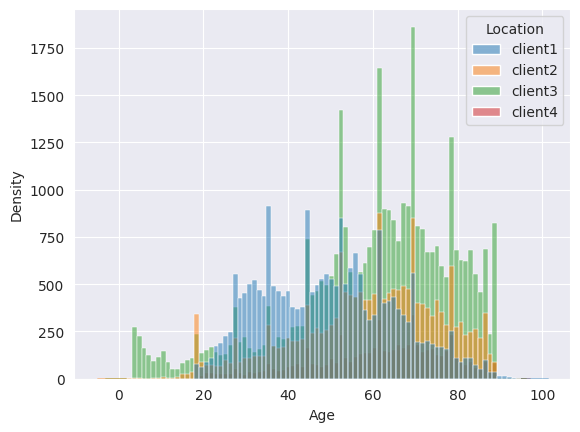

In [16]:
sns.kdeplot(ecg_df, x="Age", hue="Location", multiple="layer", fill=True)
sns.histplot(ecg_df, x="Age", hue="Location", multiple="layer", fill=True)

<Axes: xlabel='NORM', ylabel='count'>

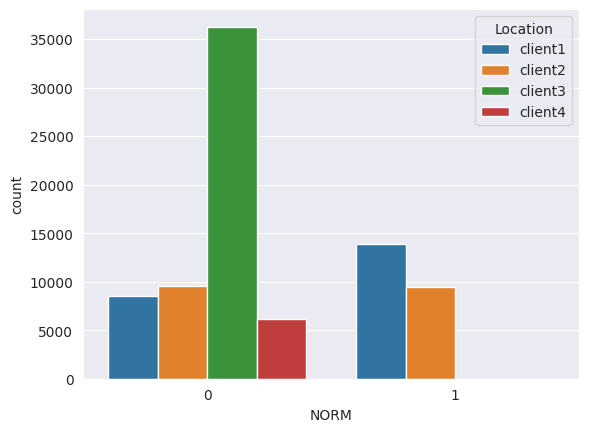

In [34]:
sns.countplot(ecg_df, x="NORM", hue="Location")